# Интерполяция

## Виды интерполяции

Интерполяция может быть 
* алгебраической: $P(x)$ &mdash; многочлен некоторой степени
* тригонометрической: $P(x)$ &mdash; тригонометрический многочлен
$$
P(x) = a_0 + a_1 \cos x + b_1 \sin x + a_2 \cos 2x + b_2 \sin 2x \dots
$$

## Сведение к СЛАУ

Интерполяцию можно свести к системе линейных алгебраических уравнений

$$
P(x_1) = c_0 + c_1 x_1 + c_2 x_1^2 + \dots = f(x_1)\\
P(x_2) = c_0 + c_1 x_2 + c_2 x_2^2 + \dots = f(x_2)\\
\vdots\\
P(x_n) = c_0 + c_1 x_n + c_2 x_n^2 + \dots = f(x_n)
$$

Неизвестными параметрами интерполирующего многочлена $P(x)$ являются его коэффициенты. Относительно них система является линейной и разрешима, если $\deg P = n-1$

### Задача

Интерполяция функции: $f(x) = \sin{x}$

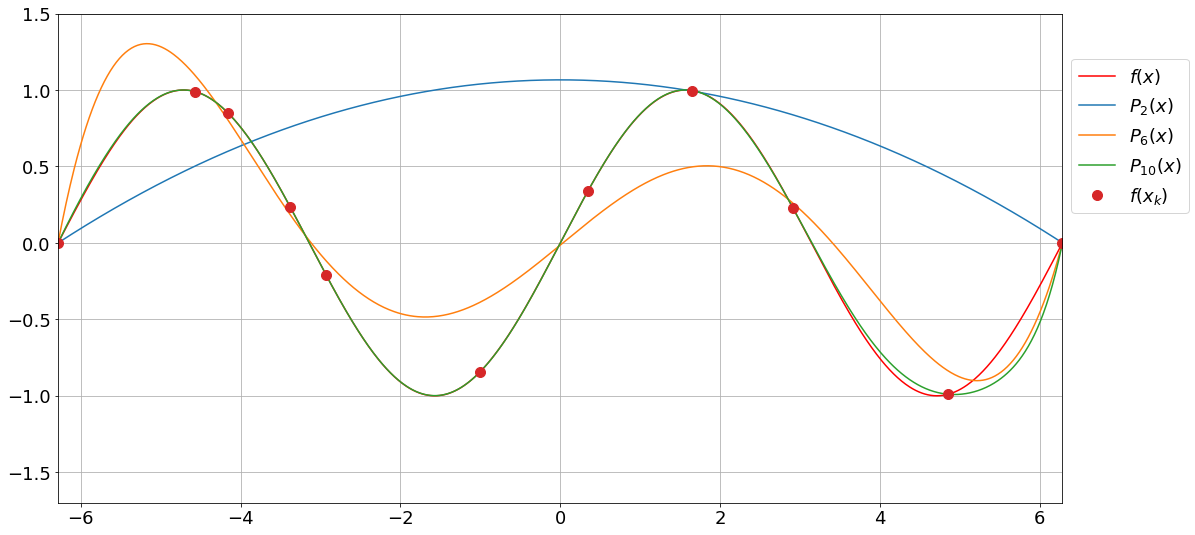

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', **{'size' : 18})
plt.figure( figsize = ( 18, 9 ) )
plt.grid()

N = 15

def f(x):
    
    return np.sin(x)

X = np.linspace(-a, a, 1000)

plt.plot(X, f(X), 'r', label='$f(x)$')

for n in np.arange( 3, N, 4 ):

    h = 0.2 + np.random.rand(n)

    x = np.cumsum(h)

    x -= x[0]

    x /= x[-1]

    a = 2 * np.pi

    x = a * (2 * x - 1)
    
    fv = f(x)

    W = np.empty( ( n, n ) )

    for k in np.arange( 0, n, 1 ):
        
        W[:, k] = x**k
        
    c = np.linalg.solve(W, fv)
    
    P = lambda x: np.polyval(list(reversed(c)), x)

    plt.plot(X, P(X), label='$P_{%d}(x)$' % (n-1))

    plt.axis([-a, a, -1.7, 1.5])
    
plt.plot(x, fv, '.', ms=20, label='$f(x_k)$')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.75))

plt.show()

## Интерполяционный многочлен в форме Ньютона
Интерполяционный многочлен в форме Ньютона имеет вид
$$
P_{n-1}(x) = f(x_1) + f(x_1, x_2) (x - x_1) + f(x_1, x_2, x_3) (x - x_1) (x - x_2) + \dots \\
\dots + f(x_1, \dots, x_n) (x - x_1) \cdots (x - x_{n-1})
$$
Величины $f(x_1, x_2), f(x_1, x_2, x_3), \dots$ называются *разделенными разностями*.

## Разделенные разности

Разделенная разность порядка $k+1$ определяется через разделенные разности порядка $k$:
$$
f(x_{i}, \dots, x_{i+k+1}) = \frac{f(x_{i+1}, \dots, x_{i+k+1}) - f(x_{i}, \dots, x_{i+k})}{x_{i+k+1} - x_{i}}
$$

In [90]:
def f( x ):
    
    return ( x ** (0.3) / ( x ** ( 0.45 ) + 2.5 * x ** ( 0.98 ) + 1.099 ) ) ** x

def divided_differences(x, f):
    
    N = x.shape[ 0 ]    
    
    F = np.empty( ( N, N ) )
    
    F[:, 0] = f
    
    for k in np.arange( 1, N, 1 ):
        
        F[ 0: N - k, k ] = ( F[ 1: N - k + 1, k - 1 ] - F[ 0: N - k, k - 1 ]) / ( x[ k: ] - x[ :-k ] )
    
    return F # F[i, k] = f(x_i, x_{i+1}, ..., x_{i+k})

def NewtonPolinom( x, x0, f ):
    
    global divided_differences
    
    N = x.shape[ 0 ];
    
    P = 0;
    
    xprod = 1.0 # (x - x1) (x - x2) ... (x - xi)
    
    F = divided_differences( x, f )
    
    for i in np.arange(0, N, 1):
        
        P += F[0, i] * xprod
        
        xprod *= (x0 - x[i])
    
    return P

In [91]:
x = np.linspace( 1., 5., 15 )

fx = f( x ) + np.random.rand(1)

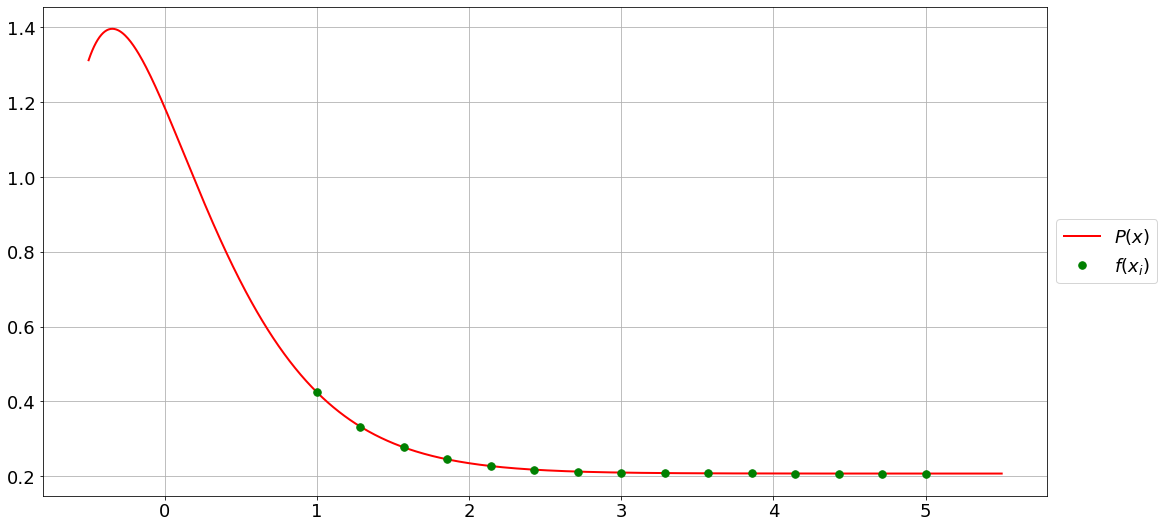

In [92]:
X = np.linspace(-0.5, 5.5, 1000)

plt.rc('font', **{'size' : 18})

plt.figure( figsize = ( 18, 9 ) )

plt.grid()

plt.plot(X, NewtonPolinom(x, X, fx ), 'r', lw=2, label='$P(x)$')

plt.plot(x, fx, 'g.', ms=15, label='$f(x_i)$')

plt.legend(loc='center left', bbox_to_anchor=(1, .5))

plt.show()